[View in Colaboratory](https://colab.research.google.com/github/iiwakuralain/TCC2/blob/master/identity_MLP_m_Input.ipynb)

In [0]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [546]:
!pip install -q xlrd
!git clone https://github.com/iiwakuralain/TCC2

Cloning into 'TCC2'...
remote: Counting objects: 97, done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 97 (delta 46), reused 31 (delta 9), pack-reused 0
Unpacking objects: 100% (97/97), done.


In [547]:
cd TCC2

/content/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2


In [548]:
ls

db_ok.csv     MLP_regressor_multi_input.ipynb
linear.ipynb  MLP_regressor_single_input.ipynb


In [0]:
import pandas as pd
df = pd.read_csv('db_ok.csv')

In [0]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [0]:
cidade = df.loc[(df['cidade'] == 1)]
#cidade = df

In [552]:
cidade.head()

,cidade,m2Aprox,4mm,3mm,$4mm,$3mm
0,1,58.652928,18054.0,15045.00000,297.782896,256.508935
1,1,148.766748,45000.0,38160.00000,297.782896,256.508935
2,1,17.855129,5000.0,4580.00000,297.782896,256.508935
3,1,120.552592,35898.5,30922.81693,297.782896,256.508935
4,1,14.619374,4375.0,3750.00000,297.782896,256.508935


In [553]:
cidade.shape

(95, 6)

In [554]:
mydf = cidade.astype('int64')
print(mydf.info()) # Overview of dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 0 to 94
Data columns (total 6 columns):
cidade     95 non-null int64
m2Aprox    95 non-null int64
4mm        95 non-null int64
3mm        95 non-null int64
$4mm       95 non-null int64
$3mm       95 non-null int64
dtypes: int64(6)
memory usage: 5.2 KB
None


In [555]:
df_cidade = mydf.drop(['3mm'], axis=1)
y = mydf['3mm']

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df_cidade, y, test_size=0.20)
print(X_train.shape, y_train.shape)

((76, 5), (76,))


In [0]:
from sklearn.neural_network import MLPRegressor

In [0]:
clf = MLPRegressor(activation='identity',solver='lbfgs',max_iter=200,
                    hidden_layer_sizes=(100,), random_state=1)

In [558]:
clf.fit(X_train, y_train)

MLPRegressor(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [0]:
predictions = clf.predict(X_test)

In [560]:
buildCompareT = {'cidade':X_test['cidade'],'m2Aprox': X_test['m2Aprox'], 'yTest': y_test, 'yPredicted':predictions.astype('int64')}
compareT = pd.DataFrame(data=buildCompareT)
compareT['Dif'] = compareT['yPredicted'] - compareT['yTest']
compareT

,cidade,m2Aprox,yPredicted,yTest,Dif
90,1,29,7436,7587,-151
94,1,21,5371,5500,-129
64,1,30,7691,7780,-89
68,1,116,30028,30000,28
18,1,77,19903,19860,43
26,1,181,47140,46593,547
27,1,224,58067,57663,404
89,1,95,24598,24400,198
20,1,4,958,1115,-157
31,1,10,2517,2689,-172


Text(0,0.5,u'Predictions')

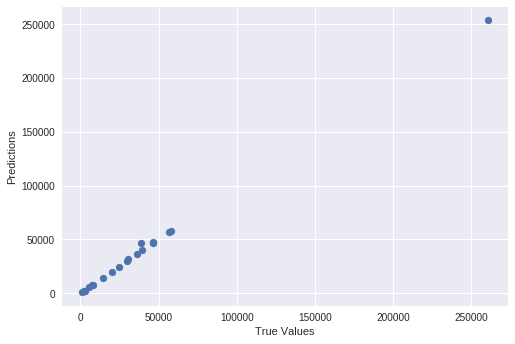

In [561]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [562]:
"""
Regression metrics
See the Regression metrics section of the user guide for further details.

metrics.explained_variance_score(y_true, y_pred)	Explained variance regression score function
metrics.mean_absolute_error(y_true, y_pred)	Mean absolute error regression loss
metrics.mean_squared_error(y_true, y_pred[, …])	Mean squared error regression loss
metrics.mean_squared_log_error(y_true, y_pred)	Mean squared logarithmic error regression loss
metrics.median_absolute_error(y_true, y_pred)	Median absolute error regression loss
metrics.r2_score(y_true, y_pred[, …])	R^2 (coefficient of determination) regression score function.
"""
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

print 'explained_variance_score: '
explained_variance_score(y_test, predictions)


explained_variance_score: 


0.9979245011585531

In [563]:
'''
Erro Absoluto Médio (MAE): Mede a magnitude média dos erros em um conjunto de 
previsões, sem considerar sua direção. É a média sobre a amostra de teste das 
diferenças absolutas entre previsão e observação real, onde todas as diferenças 
individuais têm peso igual.

Se o valor absoluto não for obtido (os sinais dos erros não são removidos), 
o erro médio torna-se o erro de polarização média (MBE) e é geralmente 
destinado a medir o viés de modelo médio. O MBE pode transmitir informações 
úteis, mas deve ser interpretado com cautela porque os erros positivos e 
negativos serão cancelados.

https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d
'''

print 'mean_absolute_error: '
mean_absolute_error(y_test, predictions)



mean_absolute_error: 


1055.4730892557743

In [564]:
"""
Robusto contra outliners.
Não suporta multi-output.

A perda é calculada tomando a mediana de todas as diferenças absolutas
entre o alvo e a predição.
"""
median_absolute_error(y_test, predictions)



198.1297355138122

In [565]:
print 'r2_score: '
r2_score(y_test, predictions)

r2_score: 


0.9979121978398969